In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [38]:
with open("Nomao.names") as f:
    print(f.read())

The Nomao dataset 

*************************
1. Title of the Dataset:  Nomao.data

*************************
2. Sources: 

(a) Original owner of database (name / phone / snail address / email address) 
Nomao / 00 33 5 62 48 33 90 / 1 avenue Jean Rieux, 31500 Toulouse / challenge@nomao.com

(b) Donor of database (name / phone / snail address / email address) 
Laurent Candillier / - /  1 avenue Jean Rieux, 31500 Toulouse  / laurent@nomao.com 

(c) Date received (databases may change over time without name change!) 
07/02/2012 

*************************
3. Past Usage:

(a) Complete reference of article where it was described/used 

@inproceedings{nomaochallenge-ecml,
  author={Laurent Candillier and Vincent Lemaire},
  title={Design and Analysis of the Nomao Challenge - Active Learning in the Real-World},
  booktitle={Proceedings of the ALRA : Active Learning in Real-world Applications, Workshop ECML-PKDD 2012, Friday, September 28, 2012, Bristol, UK},
  year = 2012,
  pages={to appear}

In [39]:
column_names = ['id','clean_name_intersect_min','clean_name_intersect_max','clean_name_levenshtein_sim','clean_name_trigram_sim',
                'clean_name_levenshtein_term',
                'clean_name_trigram_term','clean_name_including','clean_name_equality','city_intersect_min','city_intersect_max',
                'city_levenshtein_sim','city_trigram_sim','city_levenshtein_term','city_trigram_term','city_including','city_equality'
                ,'zip_intersect_min','zip_intersect_max','zip_levenshtein_sim','zip_trigram_sim','zip_levenshtein_term',
                'zip_trigram_term','zip_including','zip_equality',
                'street_intersect_min','street_intersect_max','street_levenshtein_sim','street_trigram_sim','street_levenshtein_term',
                'street_trigram_term'
                ,'street_including','street_equality','website_intersect_min','website_intersect_max','website_levenshtein_sim','website_trigram_sim',
                'website_levenshtein_term','website_trigram_term','website_including','website_equality','countryname_intersect_min','countryname_intersect_max',
                'countryname_levenshtein_sim','countryname_trigram_sim','countryname_levenshtein_term',
                'countryname_trigram_term','countryname_including','countryname_equality','geocoderlocalityname_intersect_min','geocoderlocalityname_intersect_max',
                'geocoderlocalityname_levenshtein_sim','geocoderlocalityname_trigram_sim','geocoderlocalityname_levenshtein_term','geocoderlocalityname_trigram_term',
                'geocoderlocalityname_including','geocoderlocalityname_equality','geocoderinputaddress_intersect_min','geocoderinputaddress_intersect_max',
                'geocoderinputaddress_levenshtein_sim','geocoderinputaddress_trigram_sim','geocoderinputaddress_levenshtein_term','geocoderinputaddress_trigram_term',
                'geocoderinputaddress_including','geocoderinputaddress_equality','geocoderoutputaddress_intersect_min','geocoderoutputaddress_intersect_max',
                'geocoderoutputaddress_levenshtein_sim','geocoderoutputaddress_trigram_sim','geocoderoutputaddress_levenshtein_term','geocoderoutputaddress_trigram_term',
                'geocoderoutputaddress_including','geocoderoutputaddress_equality','geocoderpostalcodenumber_intersect_min','geocoderpostalcodenumber_intersect_max',
                'geocoderpostalcodenumber_levenshtein_sim','geocoderpostalcodenumber_trigram_sim','geocoderpostalcodenumber_levenshtein_term','geocoderpostalcodenumber_trigram_term',
                'geocoderpostalcodenumber_including','geocoderpostalcodenumber_equality','geocodercountrynamecode_intersect_min','geocodercountrynamecode_intersect_max',
                'geocodercountrynamecode_levenshtein_sim','geocodercountrynamecode_trigram_sim','geocodercountrynamecode_levenshtein_term','geocodercountrynamecode_trigram_term',
                'geocodercountrynamecode_including','geocodercountrynamecode_equality','phone_diff','phone_levenshtein','phone_trigram','phone_equality','fax_diff','fax_levenshtein',
                'fax_trigram','fax_equality','street_number_diff','street_number_levenshtein','street_number_trigram','street_number_equality','geocode_coordinates_long_diff',
                'geocode_coordinates_long_levenshtein','geocode_coordinates_long_trigram','geocode_coordinates_long_equality','geocode_coordinates_lat_diff',
                'geocode_coordinates_lat_levenshtein','geocode_coordinates_lat_trigram',
                'geocode_coordinates_lat_equality','coordinates_long_diff','coordinates_long_levenshtein','coordinates_long_trigram',
                'coordinates_long_equality','coordinates_lat_diff','coordinates_lat_levenshtein','coordinates_lat_trigram',
                'coordinates_lat_equality','geocode_coordinates_diff','coordinates_diff','label']

In [40]:
df = pd.read_csv('Nomao.data',names=column_names,low_memory=False)

In [41]:
df

,id,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,0#1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,?,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,1
1,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,?,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,1
2,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,?,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,1
3,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,0.999999947284,0.999994124065,1
4,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,?,...,?,?,m,?,?,?,m,1.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0,...,0.222222222222,0.190476194024,n,0.999685099194,0.722222222222,0.272727280855,n,0.999996735202,0.999995759568,-1
34461,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1,...,0.777777777778,0.300000011921,n,0.999745065008,0.388888888889,0.333333343267,n,0.999999932864,0.999999929934,-1
34462,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,?,...,?,?,m,?,?,?,m,1.0,?,1
34463,319905#884876,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,?,...,?,?,m,?,?,?,m,0.999130880032,?,1


In [42]:
question_mark_counts_per_column = (df == '?').sum()

In [43]:
question_mark_counts_per_column.to_csv('missing2.csv')

In [44]:
df.replace('?', np.nan, inplace=True)

In [45]:
id_column = df['id']
labels = df['label']
if 'id' in df.columns:
    # Remove the 'id' column and update the DataFrame in-place
    df.drop(columns=['id'], inplace=True)

In [46]:
df

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,city_intersect_max,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,1
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,NaN,NaN,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,1
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,1
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,1,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,0.999999947284,0.999994124065,1
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,NaN,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0,0,...,0.222222222222,0.190476194024,n,0.999685099194,0.722222222222,0.272727280855,n,0.999996735202,0.999995759568,-1
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1,1,...,0.777777777778,0.300000011921,n,0.999745065008,0.388888888889,0.333333343267,n,0.999999932864,0.999999929934,-1
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,NaN,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.0,NaN,1
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,NaN,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,0.999130880032,NaN,1


In [47]:
df.head()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,city_intersect_max,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,1
1,1.0,0.75,0.857143,0.857143,0.894737,0.947368,s,n,NaN,NaN,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,1
2,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,1
3,1.0,0.75,0.857143,0.857143,0.842105,0.833333,s,n,1,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,0.999999947284,0.999994124065,1
4,0.0,0.00,0.250000,0.000000,0.250000,0.000000,n,n,NaN,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.0,NaN,1


In [48]:
# List of column names to be removed ( more than 60 % datapoints are missing)
columns_to_remove = ['city_intersect_min','city_intersect_max','city_levenshtein_sim','city_trigram_sim','city_levenshtein_term',
                     'city_trigram_term','zip_intersect_max','zip_levenshtein_sim',
                     'zip_trigram_sim','zip_levenshtein_term','zip_trigram_term','street_intersect_min','street_intersect_max',
                     'street_levenshtein_sim','street_trigram_sim','street_levenshtein_term',
                'street_trigram_term','website_intersect_min','website_intersect_max','website_levenshtein_sim','website_trigram_sim',
                     'website_levenshtein_term','website_trigram_term','countryname_intersect_min','countryname_intersect_max',
                     'countryname_levenshtein_sim','countryname_trigram_sim','countryname_levenshtein_term','phone_diff',
                     'phone_levenshtein','phone_trigram','fax_diff','fax_levenshtein','fax_trigram','coordinates_long_diff','coordinates_long_levenshtein',
                     'coordinates_long_trigram','coordinates_lat_diff','coordinates_lat_levenshtein','coordinates_lat_trigram','coordinates_diff','label'
                    ]

In [49]:
df.drop(columns=columns_to_remove, inplace=True)

In [50]:
df.head()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_including,city_equality,...,geocode_coordinates_long_levenshtein,geocode_coordinates_long_trigram,geocode_coordinates_long_equality,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality,geocode_coordinates_diff
0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.0,1.0,s,1.0,1.0,1.0,s,n,n,1.0
1,1.0,0.75,0.857143,0.857143,0.894737,0.947368,s,n,m,m,...,1.0,1.0,s,1.0,1.0,1.0,s,n,n,1.0
2,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.0,1.0,s,1.0,1.0,1.0,s,n,n,1.0
3,1.0,0.75,0.857143,0.857143,0.842105,0.833333,s,n,s,s,...,0.555555555556,0.333333343267,n,0.999961801459,0.5,0.29411765933,n,n,n,0.999999947284
4,0.0,0.00,0.250000,0.000000,0.250000,0.000000,n,n,m,m,...,1.0,1.0,s,1.0,1.0,1.0,s,m,m,1.0


In [51]:
df.to_csv('deleting.csv')

In [52]:
df.dtypes.to_csv('dtype.csv')

In [53]:
# Apply one-hot encoding to the 'category' column
df_encoded = pd.get_dummies(df, columns=['clean_name_including','clean_name_equality','city_including','city_equality',
                                         'zip_including','zip_equality','street_including','street_equality','website_including',
                                         'website_equality','countryname_including',
                                         'countryname_equality','geocoderinputaddress_including','geocoderlocalityname_including',
                                         'geocoderlocalityname_equality','geocoderinputaddress_equality',
                                        'geocoderoutputaddress_including','geocoderoutputaddress_equality',
                                         'geocoderpostalcodenumber_including','geocoderpostalcodenumber_equality',
                                         'geocodercountrynamecode_including','geocodercountrynamecode_equality',
                                         'phone_equality','fax_equality','street_number_equality','geocode_coordinates_long_equality',
                                         'geocode_coordinates_lat_equality','coordinates_long_equality','coordinates_lat_equality'
                                        ])

In [54]:
df_encoded.to_csv('r1.csv')

In [55]:
df_encoded

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,zip_intersect_min,countryname_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,...,geocode_coordinates_long_equality_s,geocode_coordinates_lat_equality_m,geocode_coordinates_lat_equality_n,geocode_coordinates_lat_equality_s,coordinates_long_equality_m,coordinates_long_equality_n,coordinates_long_equality_s,coordinates_lat_equality_m,coordinates_lat_equality_n,coordinates_lat_equality_s
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1,1,...,True,False,False,True,False,True,False,False,True,False
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,NaN,NaN,1,1,...,True,False,False,True,False,True,False,False,True,False
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1,1,...,True,False,False,True,False,True,False,False,True,False
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1,NaN,1,1,...,False,False,True,False,False,True,False,False,True,False
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,NaN,NaN,1,1,...,True,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,0,NaN,0,0,...,False,False,True,False,False,True,False,False,True,False
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,NaN,NaN,1,1,...,False,False,True,False,False,True,False,False,True,False
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,NaN,NaN,1,1,...,True,False,False,True,True,False,False,True,False,False
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,NaN,NaN,0,0,...,False,False,True,False,True,False,False,True,False,False


In [56]:
df_encoded.dtypes.to_csv('dtype2.csv')

In [57]:
missing_values2 = df_encoded.isnull().sum()

In [58]:
missing_values2.to_csv('m2.csv')

# Missing value impuation usig KNN Imputer

In [59]:
from sklearn.impute import KNNImputer

# Create a KNNImputer instance for handling missing values
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the dataset to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [60]:
df_imputed

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,zip_intersect_min,countryname_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,...,geocode_coordinates_long_equality_s,geocode_coordinates_lat_equality_m,geocode_coordinates_lat_equality_n,geocode_coordinates_lat_equality_s,coordinates_long_equality_m,coordinates_long_equality_n,coordinates_long_equality_s,coordinates_lat_equality_m,coordinates_lat_equality_n,coordinates_lat_equality_s
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,0.8,0.700000,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1.0,0.850000,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.8,1.000000,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,0.0,0.811111,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,1.0,0.622222,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,0.2,0.757143,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,1.0,0.311765,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [61]:
df_imputed.to_csv('imputed_data.csv')

In [62]:
missing_values3 = df_imputed.isnull().sum()

In [63]:
missing_values3

clean_name_intersect_min       0
clean_name_intersect_max       0
clean_name_levenshtein_sim     0
clean_name_trigram_sim         0
clean_name_levenshtein_term    0
                              ..
coordinates_long_equality_n    0
coordinates_long_equality_s    0
coordinates_lat_equality_m     0
coordinates_lat_equality_n     0
coordinates_lat_equality_s     0
Length: 133, dtype: int64

In [64]:
missing_values3.to_csv('i.csv')

# Outlier detection


In [65]:
# Scaling features before outlier detection
ss = StandardScaler()
arr_sca = ss.fit_transform(df_imputed)
df_sca = pd.DataFrame(arr_sca, columns = df_imputed.columns)

In [66]:
# First check whether the data is normally distributed or not in order to decide which method to apply
from scipy import stats
k2, p = stats.normaltest(df_sca)

In [67]:
p

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

As none of the features are normally distributed we can say that the data as a whole is not normally distributed.

In [68]:
# Using the above test we can infer that since the columns are not from normal distribution we should apply z-score method with median instead of mean

outliers = []
median = df_sca.median()
stdD = df_sca.std()
zScore = (df_sca - median)/stdD
zScoreArr = zScore.to_numpy()
for i in range(len(zScoreArr)):
    for j in zScoreArr[i]:
        if(np.abs(j)>5):
            outliers.append(i)
            break
len(outliers)

6365

In [69]:
df_outlier_removed = df_imputed.drop(outliers)
label = labels.drop(outliers)
df_outlier_removed

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,zip_intersect_min,countryname_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,...,geocode_coordinates_long_equality_s,geocode_coordinates_lat_equality_m,geocode_coordinates_lat_equality_n,geocode_coordinates_lat_equality_s,coordinates_long_equality_m,coordinates_long_equality_n,coordinates_long_equality_s,coordinates_lat_equality_m,coordinates_lat_equality_n,coordinates_lat_equality_s
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,0.8,0.700000,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1.0,0.850000,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.8,1.000000,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34458,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.6,0.816667,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
34459,0.333333,0.250000,0.401099,0.285714,0.285714,0.116279,0.4,0.705634,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,1.0,0.622222,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,1.0,0.311765,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Hypothesis Testing

In [70]:
data_columns = list(df_outlier_removed.columns)
data_columns

['clean_name_intersect_min',
 'clean_name_intersect_max',
 'clean_name_levenshtein_sim',
 'clean_name_trigram_sim',
 'clean_name_levenshtein_term',
 'clean_name_trigram_term',
 'zip_intersect_min',
 'countryname_trigram_term',
 'geocoderlocalityname_intersect_min',
 'geocoderlocalityname_intersect_max',
 'geocoderlocalityname_levenshtein_sim',
 'geocoderlocalityname_trigram_sim',
 'geocoderlocalityname_levenshtein_term',
 'geocoderlocalityname_trigram_term',
 'geocoderinputaddress_intersect_min',
 'geocoderinputaddress_intersect_max',
 'geocoderinputaddress_levenshtein_sim',
 'geocoderinputaddress_trigram_sim',
 'geocoderinputaddress_levenshtein_term',
 'geocoderinputaddress_trigram_term',
 'geocoderoutputaddress_intersect_min',
 'geocoderoutputaddress_intersect_max',
 'geocoderoutputaddress_levenshtein_sim',
 'geocoderoutputaddress_trigram_sim',
 'geocoderoutputaddress_levenshtein_term',
 'geocoderoutputaddress_trigram_term',
 'geocoderpostalcodenumber_intersect_min',
 'geocoderpostal

Z-test for population-mean v/s sample-mean

In [71]:
from statsmodels.stats import weightstats as stests

zdata = df_outlier_removed.loc[:, 'geocode_coordinates_long_trigram']

zdata_mean = zdata.mean()
print(zdata_mean)

zdata_std = zdata.std()
print(zdata_std)

0.6280873089466269
0.36756481319239


In [72]:
sample_size = 10000
zdata_sample = zdata.sample(n=sample_size)

zdata_sample_mean = zdata_sample.mean()

to_check_population_mean = 0.6

# Null hypothesis is that mean = 0.6

# Alternate hypothesis is tha mean > 0.6

In [73]:
z_test_stat = (zdata_sample_mean - to_check_population_mean)/(zdata_std/np.sqrt(sample_size))
print("z-test statistic: ", z_test_stat)

if(z_test_stat > 1.64):
  print("Reject the Null hypothesis")
else:
  print("Do not reject the Null Hypothesis")

z-test statistic:  8.738292398498226
Reject the Null hypothesis


# Dimensionality reduction

In [74]:
# Train test split prior to PCA
X_train, X_test, y_train, y_test = train_test_split(df_outlier_removed,label,test_size=0.2,random_state=22)

In [75]:
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(X_train)
pca = PCA(n_components=0.90)
df_preprocessed = pca.fit_transform(df_scaled)
df_preprocessed

array([[ 2.47934392,  1.67205032, -3.33508729, ..., -1.59201607,
         0.1405448 ,  0.00645529],
       [-1.83720547,  1.7776525 , -1.10069078, ..., -0.1248927 ,
         1.10014724, -1.2371653 ],
       [-3.00154243,  0.73338604, -2.1044609 , ...,  0.46335755,
         0.92761899, -0.95886433],
       ...,
       [ 4.82754818, -4.56734937,  0.38632247, ...,  2.94475462,
        -1.51392292,  0.06214965],
       [-1.41724551,  1.61397445, -1.76330551, ..., -0.12089884,
         1.03752317, -1.66835731],
       [-3.30922883,  0.8186223 , -0.75942081, ...,  0.33240846,
        -0.46042947,  0.99368679]])

In [76]:
np.cumsum(pca.explained_variance_)

array([24.0942881 , 35.82231547, 45.76069753, 53.51708444, 59.86791023,
       64.63888977, 68.98269821, 72.70307978, 76.02452342, 78.78046852,
       80.91040826, 82.8882999 , 84.68465888, 86.4688312 , 87.94787062,
       89.38193997, 90.75288655, 92.05980924, 93.19611286])

In [77]:
len(df_preprocessed[0])

19

In [78]:
df_outlier_removed['geocode_coordinates_long_trigram']

0        1.000000
1        1.000000
2        1.000000
3        0.333333
4        1.000000
           ...   
34458    0.400000
34459    0.200000
34461    0.217391
34463    0.125000
34464    1.000000
Name: geocode_coordinates_long_trigram, Length: 28100, dtype: float64

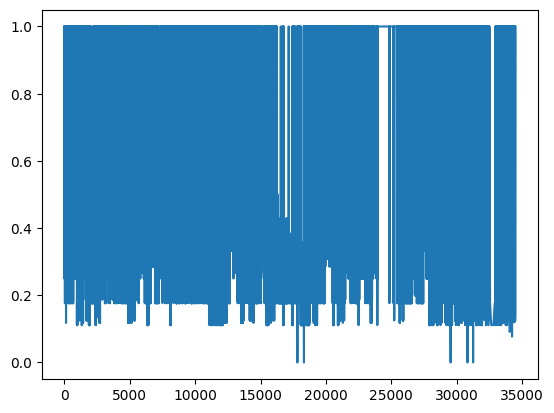

In [79]:
plt.plot(df_outlier_removed['geocode_coordinates_long_trigram'])

In [81]:
normalize_geo = normalize([df_outlier_removed['geocode_coordinates_long_trigram']])

In [82]:
normalize_geo

array([[0.00819739, 0.00819739, 0.00819739, ..., 0.00178204, 0.00102467,
        0.00819739]])

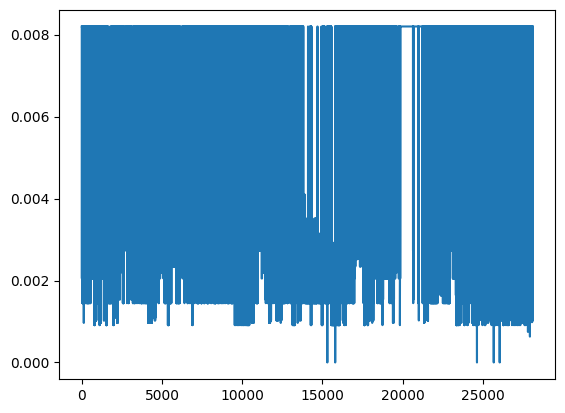

In [86]:
plt.plot(normalize_geo[0])

In [85]:
len(normalize_geo[0])

28100

In [91]:
fitted_data, fitted_lambda = stats.boxcox_llf(5,df_outlier_removed['geocode_coordinates_long_trigram'])

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:924: RuntimeWarning: divide by zero encountered in log
  logdata = np.log(data)


TypeError: cannot unpack non-iterable numpy.float64 object